In [40]:
import torch
import numpy as np
import torch.nn as nn
import torch.optim as optim
import pandas as pd
# import os
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# import sklearn
from sklearn.preprocessing import MinMaxScaler
# %matplotlib inline 

In [2]:
## Cargar al content de este sesion de colab el archivo bike_sharing_daily.csv

df = pd.read_csv('/content/bike_sharing_daily.csv')
print(df.shape)
df.head(3)

(731, 16)


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349


In [3]:
# veamos sus columnas
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [4]:
# obtenemos un sub-dataframe con al información relevante que queremos emplear
df_red = pd.concat([df['dteday'], df['mnth'], df['temp'],df['hum'], df['cnt']], axis = 1)
df_red.head()

,dteday,mnth,temp,hum,cnt
0,2011-01-01,1,0.344167,0.805833,985
1,2011-01-02,1,0.363478,0.696087,801
2,2011-01-03,1,0.196364,0.437273,1349
3,2011-01-04,1,0.200000,0.590435,1562
4,2011-01-05,1,0.226957,0.436957,1600


In [5]:
# vemos sus estadísticas, para ver si es necesario escalar algo
df_red.describe()
# será necesario escalar la cantidad de bicicletas

,mnth,temp,hum,cnt
count,731.000000,731.000000,731.000000,731.000000
mean,6.519836,0.495385,0.627894,4504.348837
std,3.451913,0.183051,0.142429,1937.211452
min,1.000000,0.059130,0.000000,22.000000
25%,4.000000,0.337083,0.520000,3152.000000
50%,7.000000,0.498333,0.626667,4548.000000
75%,10.000000,0.655417,0.730209,5956.000000
max,12.000000,0.861667,0.972500,8714.000000


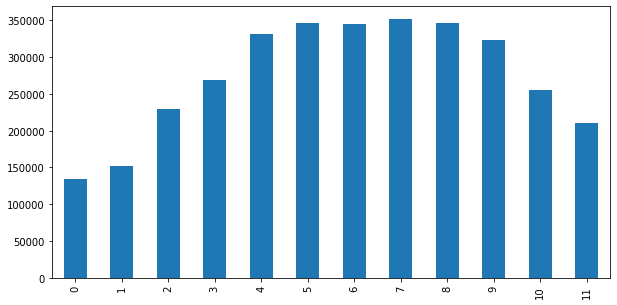

In [6]:
# preparamos para graficar 1 año.
# ordenamos todo por mes el número de bicicletas usadas

df_red = df_red.sort_values(by=['mnth','dteday'])
data_plot = df_red.groupby('mnth', as_index=False).agg('sum')[['mnth','cnt']]
data_plot['cnt'].plot.bar(figsize=(10,5))
plt.show()

In [24]:
# armamos un listado con los nombres de los meses
# luego lo usaremos para el embeding
meses = ['enero','febrero','marzo','abril','mayo','junio','julio','agosto','septiembre','octubre','noviembre','diciembre']

In [28]:
len(meses)

12

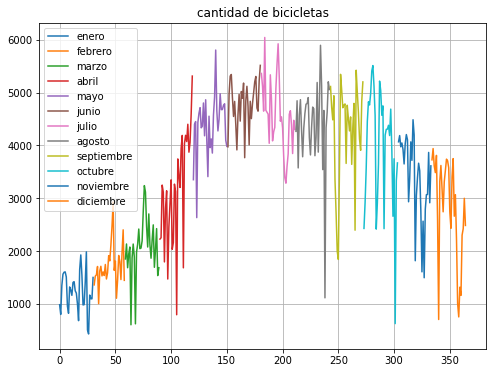

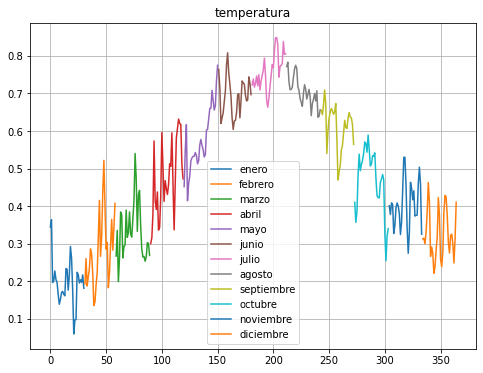

In [29]:
# Ahora graficamos a los largo de 1 año, la cantidad de bicicletas usadas
# y la temperatura día x día
# nos copiamos de df original para traer el año

data_plot_2 = df[['dteday','cnt','mnth','yr', 'temp']]
data_plot_2= data_plot_2[data_plot_2['yr']==0]
plt.figure()
# ploteamos cantidad de bicis para el año 0, dia a dia
for x in range(1,13):
    data_plot_2[data_plot_2['mnth']==x]['cnt'].plot(figsize=(8,6))
# ploteamos temperatura para el año 0, dia a dia
plt.legend(meses)
plt.grid()
plt.title('cantidad de bicicletas')
plt.figure()
for x in range(1,13):
    data_plot_2[data_plot_2['mnth']==x]['temp'].plot(figsize=(8,6))
plt.legend(meses)
plt.grid()
plt.title('temperatura')
plt.show()

In [30]:
# escalamos la cantidad
scaler = MinMaxScaler()
df_red['cnt_Scaled'] = scaler.fit_transform(df_red[['cnt']])
df_red.head()

,dteday,mnth,temp,hum,cnt,cnt_Scaled
0,2011-01-01,1,0.344167,0.805833,985,0.110792
1,2011-01-02,1,0.363478,0.696087,801,0.089623
2,2011-01-03,1,0.196364,0.437273,1349,0.152669
3,2011-01-04,1,0.200000,0.590435,1562,0.177174
4,2011-01-05,1,0.226957,0.436957,1600,0.181546


In [31]:
# armamos una array con los datos de entrenamiento
x_y_arr = np.array(df_red)

# tomamos variable: mnth, temp, hum y cnt_Scaled
x_y = np.array([x_y_arr[:,1],x_y_arr[:,2],x_y_arr[:,3],x_y_arr[:,5]])

# trasponemos para quede de la forma correcta
x_y = x_y.T
x_y.shape

(731, 4)

In [49]:
np.arange(1,13)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [53]:
# armamos un diccionario que me mapee el mes del df a un índex
# esto es así por que en el df no tenemos los nombres con meses,
# sinó con números
mes_to_ix = {mes: i for i, mes in enumerate(np.arange(1,13))}

print('diccionario de vocabulario')
mes_to_ix

# no está ordenado (por cronología) pero no importa...

diccionario de vocabulario


{1: 0, 2: 1, 3: 2, 4: 3, 5: 4, 6: 5, 7: 6, 8: 7, 9: 8, 10: 9, 11: 10, 12: 11}

In [54]:
mes_to_ix[1]

0

In [55]:
# me creo una inizialización del embredding..
# prestar atención a las dimensiones
# según el modelo que creen

weight = torch.ones([12,2])

In [57]:
class red_emb(nn.Module):

    def __init__(self, vocab_size, embedding_dim):
        super(red_emb, self).__init__()
        #self.embeddings = nn.Embedding(vocab_size, embedding_dim)
        self.embeddings = nn.Embedding.from_pretrained(weight, freeze=False)
        self.linear1 = nn.Linear(2 + embedding_dim, 12)
        self.relu= nn.ReLU()
        self.linear2 = nn.Linear(12, 1)

    def forward(self, x, inputs):
        embeds = self.embeddings(inputs).view((1, -1))
        final_input = torch.cat([x, embeds], dim=1) 
        linear1_out = self.linear1( final_input)
        out = self.relu(linear1_out)
        out = self.linear2(out)
        return out

33.61833583149759
17.711909616378648
16.49043638772295
15.58069066356888
15.681061391896208
15.207225750710666
14.586174552858424
15.11935313547579
14.736447772987816
14.79516075093014


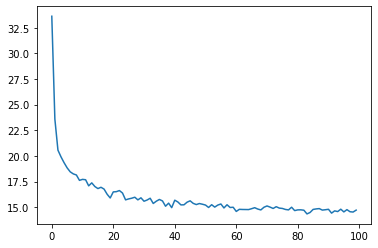

In [58]:
losses = []
loss_function = nn.MSELoss()
model = red_emb(12, 2)
optimizer = optim.SGD(model.parameters(), lr=0.02)
# print(model.embeddings.weight[word_to_ix[1]])
# print(model.linear1.weight[0])
for epoch in range(100):
    total_loss = 0
    largo = len(x_y)
    # armo un vector de indices random para leer
    # mi matriz de datos de forma aleatoria
    index_rand = np.random.permutation(largo)
    for i in range(largo):
      # saco el índice de ese vector de indices random
      indice = index_rand[i]
      # saco el mes y le paso por el mes_to_ix
      mes_i = x_y[indice,0]
      mes_idxs = torch.tensor(mes_to_ix[mes_i], dtype=torch.long)
      # saco las otras variables      
      x =  torch.tensor([[x_y[indice,1],x_y[indice,2]]])
      # saco el valor deseado
      target = torch.tensor([[x_y[indice,3]]])

      # preparo el  modelo (limpio el gradiente)
      model.zero_grad()

      # le paso el la input (la x y los meses para el embedding)
      pred = model(x, mes_idxs)

      # calculo la loss
      loss = loss_function(pred.float(), target.float())

      # Step 5. Do the backward pass and update the gradient
      loss.backward()
      optimizer.step()

        # Get the Python number from a 1-element Tensor by calling tensor.item()
      total_loss += loss.item()
    losses.append(total_loss)
    if (int(epoch) % 10) == 0:
        print(total_loss)
        # print(model.embeddings.weight[word_to_ix[1]])
        # print(model.linear1.weight[0])
#print(losses)  # The loss decreased every iteration over the training data!
plt.plot(losses)
plt.show()

In [59]:
# veamos como quedaron los embeddings
model.embeddings.weight

Parameter containing:
tensor([[0.9369, 1.1884],
        [0.9098, 1.2700],
        [0.9704, 1.1332],
        [0.6485, 0.8425],
        [0.8573, 0.8223],
        [0.7346, 0.8005],
        [0.8049, 1.2637],
        [0.7140, 1.0287],
        [1.1764, 0.5246],
        [1.1661, 0.7049],
        [0.9569, 0.7923],
        [1.2129, 1.0476]], requires_grad=True)

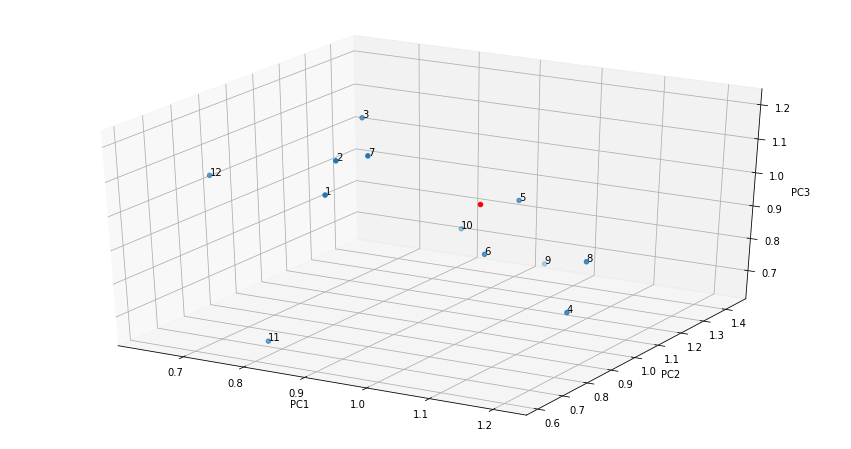

In [ ]:
# para graficar un embedding de dimensión 3

emb = model.embeddings.weight.detach().numpy()
fig = plt.figure(figsize=[15,8])
ax = fig.add_subplot(projection='3d')
ax.scatter(emb[:,0], emb[:,1], emb[:,2])
ax.scatter(1, 1, 1, c='red')
#plt.scatter(rotated_X1[:,0], rotated_X1[:,1] , c=y_train_c)

plt.xlabel('PC1')
plt.ylabel('PC2')
ax.set_zlabel('PC3')
# Etiquetamos cada punto para mayor claridad

texts = [ax.text(emb[i,0], emb[i,1], emb[i,2], txt) for i, 
       txt in enumerate(meses)]
#ax.view_init(*(25, -45))
plt.show()

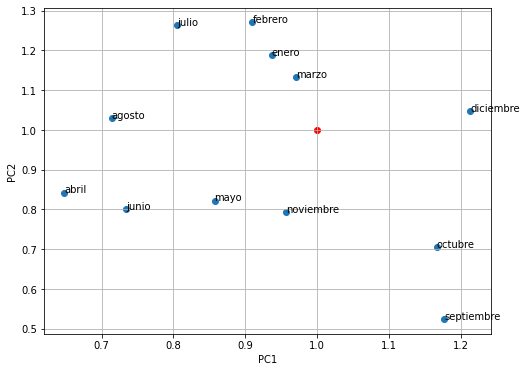

In [64]:
# para graficar un embedding de dimensión 2

emb = model.embeddings.weight.detach().numpy()
fig = plt.figure(figsize=[8,6])
ax = fig.add_subplot()


ax.scatter(emb[:,0], emb[:,1])
ax.scatter(1, 1, c='red')

plt.xlabel('PC1')
plt.ylabel('PC2')

# Etiquetamos cada punto para mayor claridad

texts = [ax.text(emb[i,0], emb[i,1], txt) for i, 
       txt in enumerate(meses)]

plt.grid()
plt.show()